In [22]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2
import os
from EmoPy.src.fermodel import FERModel
from pkg_resources import resource_filename

In [11]:
picture1 = '../Test_pictures/crowd.jpg'

In [12]:
image1 = face_recognition.load_image_file(picture1)

face_locations1 = face_recognition.face_locations(image1)

In [13]:
face_locations1

[(286, 299, 329, 256),
 (252, 544, 295, 501),
 (239, 458, 291, 406),
 (180, 343, 223, 299),
 (190, 413, 226, 377),
 (310, 424, 353, 381),
 (204, 698, 247, 655)]

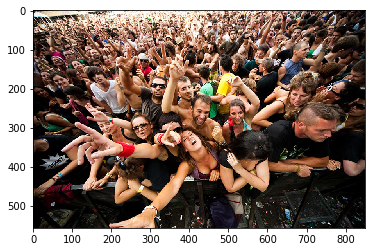

In [14]:
plt.imshow(image1)

In [25]:
# face locations is returning an array with all the faces that it found in the picture, we iterate trough each one
# and save them in a tmp_img_to_process where the images will be processed and later deleted

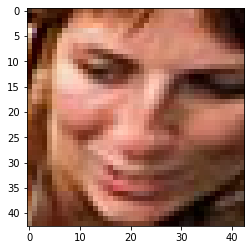

In [38]:
for index, face in enumerate(face_locations1):
    top, right, bottom, left = face
    face_image = image1[top:bottom, left:right]
    plt.imshow(face_image)
    image_save = Image.fromarray(face_image)
    image_save.save(f"/home/andrea/EmoPy/EmoPy/tmp_img_to_process/to_process{index}.jpg")

In [27]:
# read one by one the newly created images and detect and print on screen the emotion found

In [40]:
files_to_process = os.listdir("/home/andrea/EmoPy/EmoPy/tmp_img_to_process")
target_emotions = ['calm', 'happiness', 'anger']
model = FERModel(target_emotions, verbose=True)
predictions = []

for file in files_to_process:
    print(f'Predicting for image {file}')
    model.predict(resource_filename("EmoPy", f'tmp_img_to_process/{file}'))

Initializing FER model parameters for target emotions: ['calm', 'happiness', 'anger']
Predicting for image to_process4.jpg
anger: 41.1%
calm: 16.9%
happiness: 42.0%
Predicting for image to_process2.jpg
anger: 40.1%
calm: 7.3%
happiness: 52.7%
Predicting for image to_process5.jpg
anger: 26.4%
calm: 0.0%
happiness: 73.6%
Predicting for image to_process6.jpg
anger: 24.2%
calm: 19.2%
happiness: 56.6%
Predicting for image to_process3.jpg
anger: 33.5%
calm: 36.2%
happiness: 30.3%
Predicting for image to_process0.jpg
anger: 47.9%
calm: 6.6%
happiness: 45.5%
Predicting for image to_process1.jpg
anger: 39.6%
calm: 1.5%
happiness: 58.9%


In [29]:
# !!!!!!!!!!!!!!
# resize image
# !!!!!!!!!!!!!!
# # from PIL import Image
# im = Image.open('half_body.jpg')
# new_image = im.resize((48,48))
# new_image.save('half_body.jpg')

In [31]:
# new_image_to_array = np.array(new_image)

In [44]:
# age and gender detection

# for file in files_to_process:
    